In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/96653/Desktop/Tuwaiq_Labs/Usecase-7/final_data.csv")

In [3]:
df.shape

(10754, 22)

In [7]:
df.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


In [9]:
df.tail(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.0,18.0,21,0.0,0.0,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


In [11]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [15]:
df.describe(include="object")

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [17]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [19]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [21]:
df.isnull().sum().sort_values(ascending = False)


player                 0
team                   0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
goals conceded         0
red cards              0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
name                   0
winger                 0
dtype: int64

In [23]:
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [25]:
df.drop(["player"],axis=1,inplace=True)

In [27]:
df.drop(["award"],axis=1,inplace=True)

In [29]:
df.drop(["highest_value"],axis=1,inplace=True)

In [31]:
df.drop(["name"],axis=1,inplace=True)

In [33]:
df.drop(["position"],axis=1,inplace=True)

In [35]:
df.shape

(10754, 17)

(6974, 17)

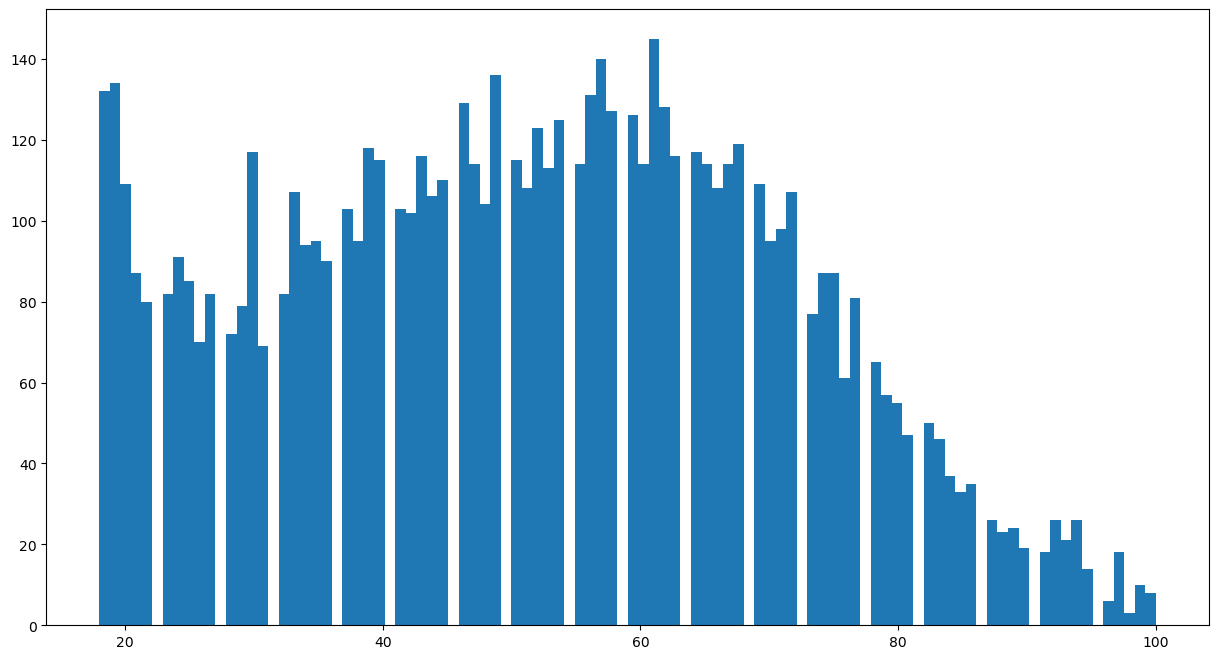

In [38]:
plt.figure(figsize=(15,8))

plt.hist(df[(df['appearance'] >= 18)  & (df['appearance'] <= 100 )]['appearance'],bins=100);
df[(df['appearance'] >= 18 )  & (df['appearance'] <= 100 )].shape

In [40]:
df= df[(df['appearance'] >= 18)  & (df['appearance'] <= 100 )]

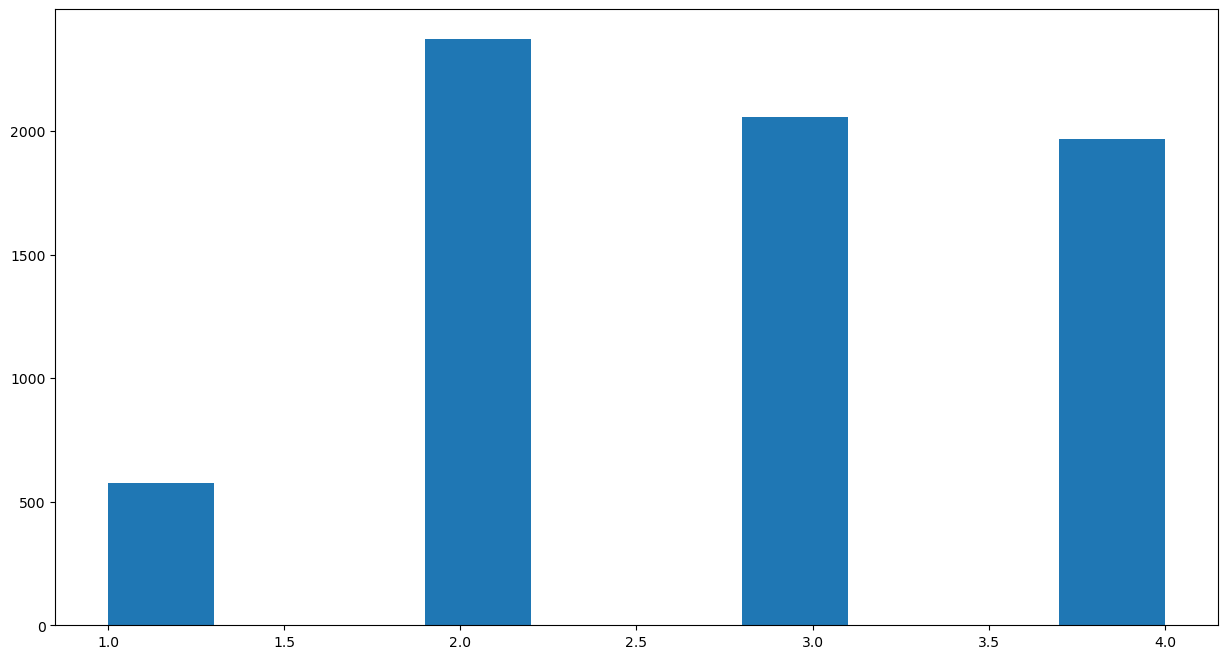

In [42]:
plt.figure(figsize=(15,8))
plt.hist(df['position_encoded']);


(4232, 17)

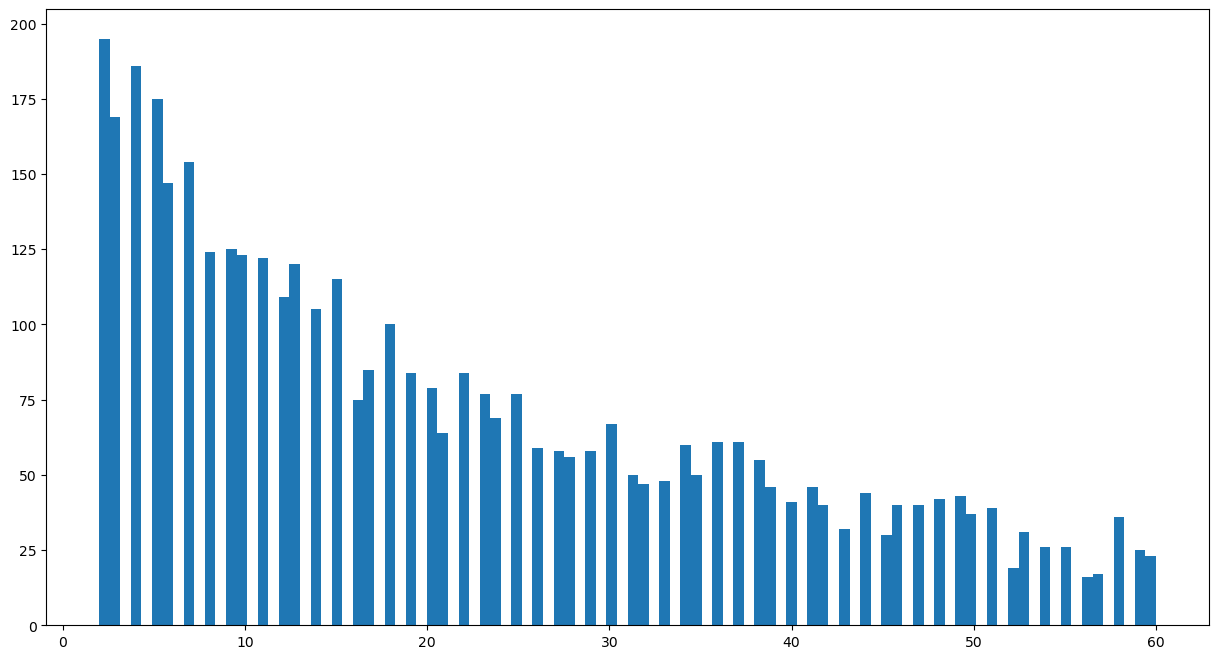

In [44]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['games_injured'] >= 2)  & (df['games_injured'] <= 60 )]['games_injured'],bins=100);
df[(df['games_injured'] >= 2)  & (df['games_injured'] <= 60  )].shape

In [46]:
df=df[(df['games_injured'] >= 2)  & (df['games_injured'] <= 60 )]

(4086, 17)

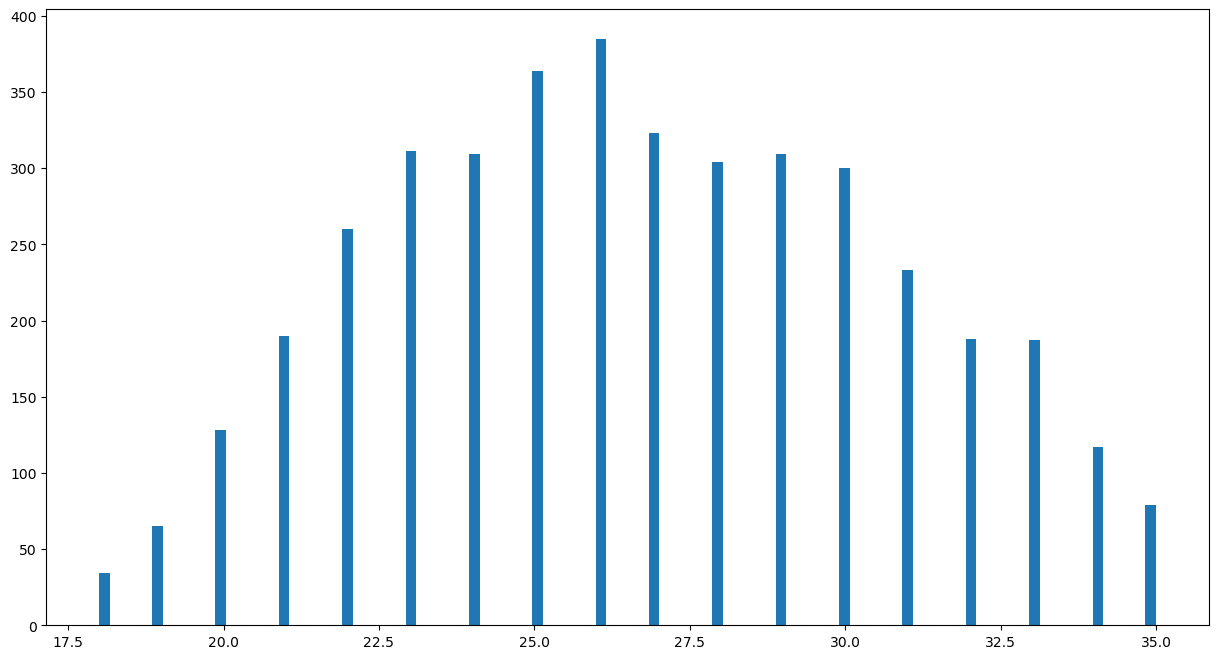

In [48]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['age'] >= 18)  & (df['age'] <= 35 )]['age'],bins=100);
df[(df['age'] >= 18)  & (df['age'] <= 35 )].shape


In [50]:
df = df[(df['age'] >= 18)  & (df['age'] <= 35 )]

In [52]:
df.shape

(4086, 17)

In [54]:
df.dtypes

team                    object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
current_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [56]:
categorical_features = ['team']

In [58]:
df = pd.get_dummies(df, columns=categorical_features)

In [60]:
df.shape

(4086, 374)

In [62]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [64]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value               1.000000
appearance                  0.436558
minutes played              0.408360
team_Manchester City        0.230281
team_Paris Saint-Germain    0.210879
                              ...   
team_SV Ried               -0.037609
red cards                  -0.046312
goals conceded             -0.058818
yellow cards               -0.068213
age                        -0.168647
Name: current_value, Length: 374, dtype: float64


In [66]:
threshold = 0.2 

selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value', 'team_Bayern Munich',
       'team_Manchester City', 'team_Paris Saint-Germain'],
      dtype='object')

In [68]:
selected_features = ['appearance', 'minutes played', 'current_value', 'team_Bayern Munich',
       'team_Manchester City', 'team_Paris Saint-Germain']

In [70]:
df = df[selected_features]
df.head(1)

,appearance,minutes played,current_value,team_Bayern Munich,team_Manchester City,team_Paris Saint-Germain
3,82,6408,50000000,False,False,False


In [72]:
X = df.drop(['current_value'], axis=1)
y = df['current_value']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
X.shape

(4086, 5)

In [76]:
model = LinearRegression()


In [78]:
ridge_model = Ridge() 

In [80]:
lasso_model = Lasso()

In [82]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [84]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [86]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 5}
Best Parameters for lasso model: {'alpha': 0}


In [88]:
y_pred = model.predict(X_test_scaled)                  
y_pred_ridge = best_model_ridge.predict(X_test_scaled) 
y_pred_lasso = best_model_lasso.predict(X_test_scaled) 

In [92]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])                  
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) 
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) 


In [94]:
coeff_df

,Coefficient
appearance,3.663629e+06
minutes played,1.257794e+06
team_Bayern Munich,2.440085e+06
team_Manchester City,1.646634e+06
team_Paris Saint-Germain,2.483382e+06


In [96]:
coeff_df_ridge

,Coefficient
appearance,3.647624e+06
minutes played,1.270370e+06
team_Bayern Munich,2.436736e+06
team_Manchester City,1.644232e+06
team_Paris Saint-Germain,2.479710e+06


In [98]:
coeff_df_lasso

,Coefficient
appearance,3.663629e+06
minutes played,1.257794e+06
team_Bayern Munich,2.440085e+06
team_Manchester City,1.646634e+06
team_Paris Saint-Germain,2.483382e+06


In [100]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 6380125.458996328


In [102]:
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 

 Ridge model intercept: 6380125.458996328


In [104]:
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 

 Lasso model intercept: 6380125.458996328


In [106]:
y_base = [y_train.mean()] * len(y_test)

In [108]:
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 1.674891e+14


In [110]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 9.665311e+13
Mean Squared Error for testing: 1.180020e+14


In [112]:
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')

Mean Squared Error for training ridge model: 9.665321e+13
Mean Squared Error for testing ridge model: 1.180133e+14


In [114]:
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 9.665311e+13
Mean Squared Error for testing lasso model: 1.180020e+14


In [116]:
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 7.145376e+06


In [118]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 5.856481e+06
Mean Absolute Error for testing: 6.239040e+06


In [120]:
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 5.855211e+06
Mean Absolute Error for testing ridge model: 6.237737e+06


In [122]:
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 5.856481e+06
Mean Absolute Error for testing lasso model: 6.239040e+06


In [124]:
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 1.294176e+07


In [126]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 9.831231e+06
Root Mean Squared Error for testing: 1.086287e+07


In [128]:
print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')

Root Mean Squared Error for training ridge model: 9.831236e+06
Root Mean Squared Error for testing ridge model: 1.086339e+07


In [130]:
print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 9.831231e+06
Root Mean Squared Error for testing lasso model: 1.086287e+07


In [132]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.3009521946504823
R Square for testing: 0.29522042128368


In [134]:
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.30095149063764426
R Square for testing ridge model: 0.2951527892475936


In [136]:
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.3009521946504823
R Square for testing lasso model: 0.29522042128367987


In [138]:
predictions = model.predict(X_test_scaled)

In [140]:
Real_Values = np.array(y_test)

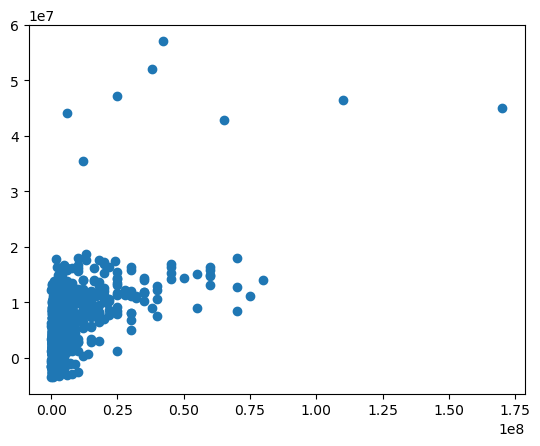

In [142]:
plt.scatter(Real_Values,predictions); 

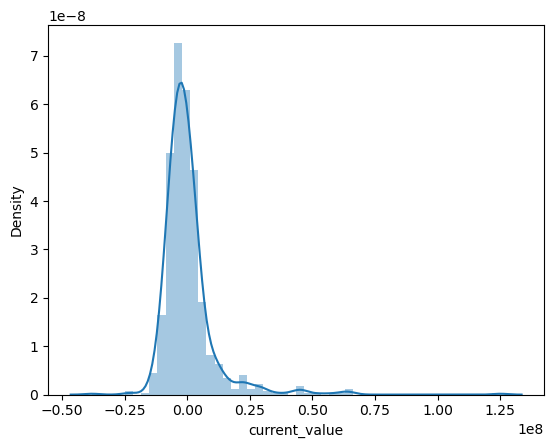

In [144]:
sns.distplot((y_test-predictions));